In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [3]:
X, y = datasets.make_moons(200, noise=0.15)

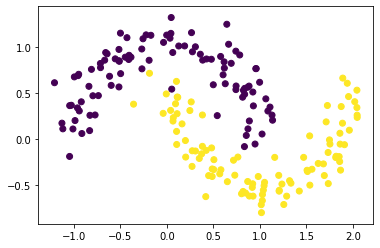

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
print("X shape : ",X.shape)
print("Y shape : ",y.shape)

X shape :  (200, 2)
Y shape :  (200,)


In [6]:
def retrieve(model):
    return model['W1'], model['b1'], model['W2'], model['b2']

In [7]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model

In [8]:
def feed_forward(x, model):
    W1, b1, W2, b2 = retrieve(model)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)  # Applying to the output model
    # Applying Softmax and before applying softmax, we need to turn them into exponents
    exps = np.exp(a2)
    softmax = exps / np.sum(exps, axis=1, keepdims=True)
    return softmax

In [9]:
def loss(softmax, y, model):
    W1, b1, W2, b2 = retrieve(model)
    # First we apply regularization
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    # Applying the cross entropy
    crossentropy = -np.log(m)
    crossentropy_sum = np.sum(log_prob)
    # regularization
    regularization = lamb / 2 * (np.sum((np.square(W1))) + np.sum((np.square(W2))))
    regularized_loss = crossentropy_sum + regularziation
    return loss / y.shape[0]

In [10]:
def predict(x, model):
    W1, b1, W2, b2 = retrieve(model)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exps = np.exp(a2)
    softmax = exps / np.sum(exps, axis=1, keepdims=True)
    return np.argmax(softmax)

In [ ]:
def backpropagation(x, y, model, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model)
        z1, a1, probs = forward(x, model)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]),y] -= 1
        delta3 = 
        dW2 = (a1.T).dot(delta3)    # (3,200) dot (200,2) => (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True) # (1,2)
        delta2 = 